IMPORTING THE REQUIRED

In [3]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [4]:
import keras

LOADING THE SPLITTING THE DATA

In [5]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [6]:
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [7]:
print(X_train[0].shape)

(32, 32, 3)


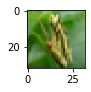

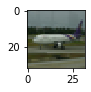

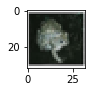

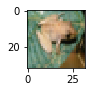

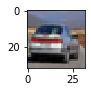

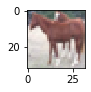

In [13]:
for i in range(232, 238):
    plt.subplot(120 + 1 + i)
    img = X_train[i]
    plt.imshow(img)
    plt.show()

PREPROCESSING THE DATA

In [14]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255
n_classes = 10

print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


BUILDING THE MODEL

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

model = Sequential()
# convolution layers
model.add(Conv2D(50, kernel_size = (3, 3), strides = (1, 1), padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))

model.add(Conv2D(75, kernel_size = (3, 3), strides = (1, 1), padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size = (3, 3), strides = (1, 1), padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

# hidden layer
model.add(Dense(500, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation = 'relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(10, activation = 'softmax'))

# compiling
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

# training
model.fit(X_train, Y_train, batch_size = 128, epochs = 20, validation_data = (X_test, Y_test))

2022-01-06 07:23:47.387969: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/20
391/391 [==============================] - 252s 642ms/step - loss: 1.5562 - accuracy: 0.4270 - val_loss: 1.1660 - val_accuracy: 0.5900
Epoch 2/20
110/391 [=======>......................] - ETA: 2:55 - loss: 1.1852 - accuracy: 0.5754

PREDICTING

In [ ]:
classes = range(0, 10)

names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']

# zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes, names))

# generate batch of 9 images to predict
batch = X_test[100: 109]
labels = np.argmax(Y_test[100:109], axis = -1)

# make predictions
predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 0s 153ms/step


In [ ]:
print(predictions)

[[3.06060457e-07 3.90952266e-08 3.99226090e-03 3.36924777e-03
  8.83464336e-01 4.86640185e-02 1.74055618e-04 6.03346862e-02
  7.53633799e-07 1.48182650e-07]
 [1.71444044e-05 9.86693522e-06 1.16589840e-03 1.37168784e-02
  2.82212277e-03 8.84448290e-01 9.64000449e-02 1.35194033e-03
  3.27982707e-06 6.45662003e-05]
 [2.87074499e-07 5.14090118e-07 4.08081687e-05 6.32070369e-05
  1.67587825e-06 1.80490497e-05 9.99874234e-01 1.00241984e-07
  7.99604436e-08 1.12087218e-06]
 [1.56435192e-06 6.62864750e-07 6.23150321e-04 9.26887810e-01
  4.66792146e-03 3.52124614e-03 6.42266497e-02 4.87904290e-05
  2.71126601e-06 1.94626318e-05]
 [5.16790832e-10 9.93376672e-01 3.31515593e-16 7.20358005e-16
  2.79176332e-20 3.09209026e-18 1.05761699e-12 9.81596969e-17
  1.27486814e-07 6.62316754e-03]
 [6.75742911e-08 9.99994397e-01 6.41430242e-11 2.28437824e-11
  3.11532077e-14 1.98612042e-13 1.31178887e-10 4.71192773e-14
  6.51804271e-07 4.87082525e-06]
 [3.95592186e-04 3.25200817e-04 2.09720246e-02 7.97322094e

In [ ]:
for image in predictions:
    print(np.sum(image))

0.9999998
1.0
1.0000001
1.0
0.99999994
1.0
1.0
0.99999994
1.0


In [ ]:
class_result = np.argmax(predictions, axis = -1)
print(class_result)

[4 5 6 3 1 1 3 6 8]


FINAL OBJECT DETECTION

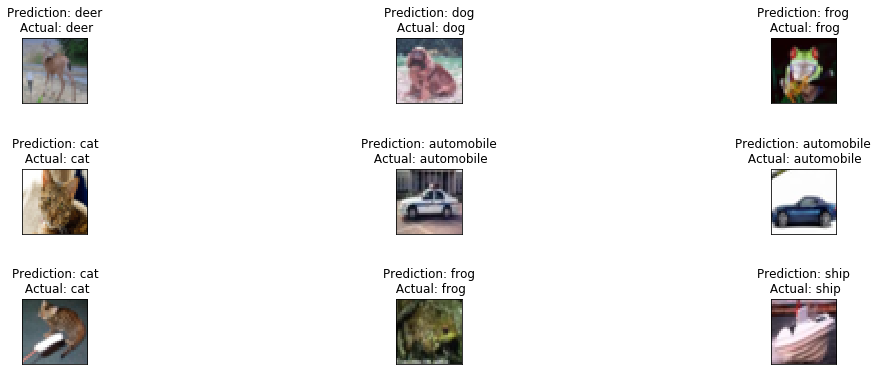

In [ ]:
fig, axs = plt.subplots(3, 3, figsize = (19, 6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\n Actual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)

    # plot the image
    axs[i].imshow(img)

# show the plot
plt.show()